# Fysikklab, TFY4104, 4107 og 4115 våren 2022.

Følgende notebook genererer en rullebane basert på koordinatene til åtte festepunkter med tilfeldig tilegnede høyder. 
Baneformen $y(x)$ beregnes med __CubicSpline__ fra interpolate-biblioteket i SciPy. En naturlig kubisk spline $S$ er et stykkevis kubisk polynom på et intervall $[a,b]$, slik at $S$, $S' = \frac{dS}{dx}$ og $S'' = \frac{d^2S}{dx^2}$ er kontinuerlige på hele intervallet, og $S''(a) = S''(b) = 0$.    

<par>Vi skal beregne ulike fysiske størrelser for en kule som ruller gjennom den genererte bane. Da vi kjenner kulens bane (vi antar at den er lik baneformen $y(x)$), skal det gå som en lek :-) Som vi vil se, er høydekoordinatene tilfeldig generert innenfor visse kriterier som skal forsikre at <li> Kula kommer seg gjennom hele banen, og </li> <li> Banen aldri har for stor helningsvinkel. </li>
    
<par> Dere kan kjøre denne koden et par ganger til dere finner en baneform dere liker. Når dere har gjort dette er det viktig at dere skriver ned koordinatene til festepunktene! Disse blir generert på nytt hver gang koden blir kjørt. Husk at dere skal sette opp banen fysisk neste økt.
    

Vi begynner med å importere nyttige bibliotek

In [221]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Vi lager en array som inneholder x-koordinatene til festepunktene. Horisontal avstand mellom festepunktene er 0.200 m.

In [222]:
h = 0.200
xfast=np.asarray([0,h,2*h,3*h,4*h,5*h,6*h,7*h])

Start, slutt og steglengde i x-rettning:

In [223]:
xmin = 0.000
xmax = 1.401
dx = 0.001

Vi genererer en array med høydekoordinatene til festepunktene. 

In [224]:
ymax = 300
# yfast: tabell med 8 heltall mellom 50 og 300 (mm); representerer
# høyden i de 8 festepunktene
yfast=np.asarray(np.random.randint(50, ymax, size=8))
#konverter fra m til mm
yfast =yfast/1000
# inttan: tabell med 7 verdier for (yfast[n+1]-yfast[n])/h (n=0..7); dvs
# banens stigningstall beregnet med utgangspunkt i de 8 festepunktene.
inttan = np.diff(yfast)/h
attempts=1
# while-løkken sjekker om en eller flere av de 3 betingelsene ovenfor
# ikke er tilfredsstilt; i så fall velges nye festepunkter inntil
# de 3 betingelsene er oppfylt
while (yfast[0] < yfast[1]*1.04 or
       yfast[0] < yfast[2]*1.08 or
       yfast[0] < yfast[3]*1.12 or
       yfast[0] < yfast[4]*1.16 or
       yfast[0] < yfast[5]*1.20 or
       yfast[0] < yfast[6]*1.24 or
       yfast[0] < yfast[7]*1.28 or
       yfast[0] < 0.250 or
       np.max(np.abs(inttan)) > 0.4 or
       inttan[0] > -0.2):
          yfast=np.asarray(np.random.randint(0, ymax, size=8))
          
          #konverter fra m til mm
          yfast =yfast/1000
          
          inttan = np.diff(yfast)/h
          attempts=attempts+1


# Omregning fra mm til m:
# xfast = xfast/1000
# yfast = yfast/1000

# Når programmet her har avsluttet while-løkka, betyr det at
# tallverdiene i tabellen yfast vil resultere i en tilfredsstillende bane. 


Programmet beregner deretter 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter. Med scipy.interpolate-funksjonen CubicSpline:

In [225]:
cs = CubicSpline(xfast, yfast, bc_type='natural')

xmin = 0.000
xmax = 1.401
dx = 0.001

Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eventuelt for mange horisontale posisjoner lagret i en tabell: <br>
`cs(x)`   tilsvarer $y(x)$<br>
`cs(x,1)` tilsvarer $y'(x)$<br>
`cs(x,2)` tilsvarer $y''(x)$<br>

<br>
Vi vil ha en tetter diskretisering av x og y. Her lager vi en tabell med x-verdier mellom 0 og 1.4 m

In [226]:
x = np.arange(xmin, xmax, dx) 

Funksjonen arange returnerer verdier på det "halvåpne" intervallet
`[xmin,xmax)`, dvs slik at xmin er med mens xmax ikke er med. Her blir
dermed `x[0]=xmin=0.000`, `x[1]=xmin+1*dx=0.001`, ..., `x[1400]=xmax-dx=1.400`, 
dvs x blir en tabell med 1401 elementer
<br>

<par> Vi lager arrays for $y$, $y'$ og $y''$ -- også med 1401 elementer. </par>

In [227]:
Nx = len(x)
y = cs(x)       #y=tabell med 1401 verdier for y(x)
dy = cs(x,1)    #dy=tabell med 1401 verdier for y'(x)
d2y = cs(x,2)   #d2y=tabell med 1401 verdier for y''(x)
# type(d2y)

Nå kan vi plotte baneformen $y(x)$

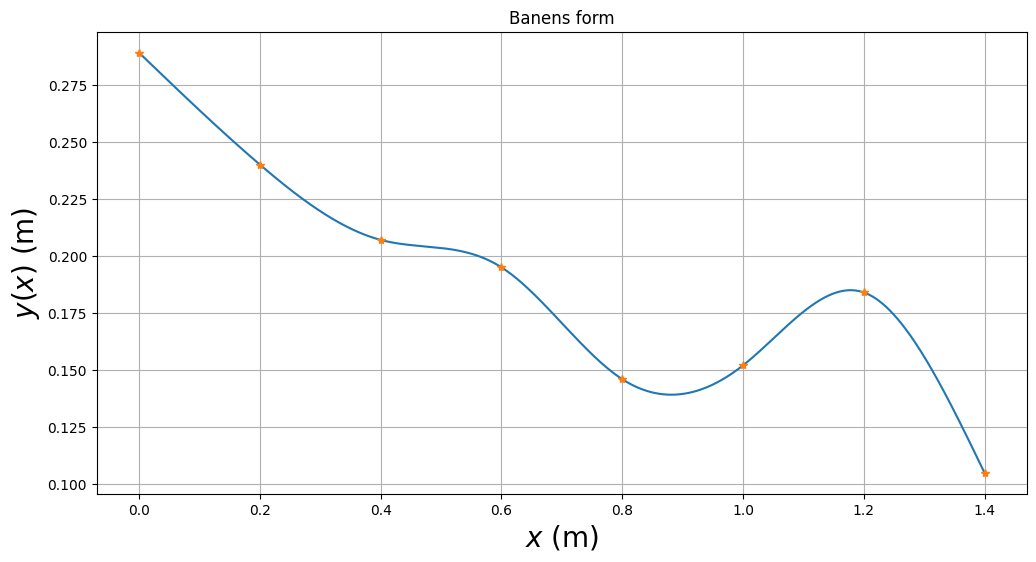

In [228]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.grid()
plt.show()

Denne koden kan nå utvides til å regne ut flere interessante størelser =) 

In [229]:
gravity = 9.81
c = 2/5 # c=2/5 for en kule
masse = 0.031 # kg for kulen
radius = 0.011 # m for kulen
# y[0] # starthøyde



def v_y(y_num):
    return np.sqrt((2*gravity*(y[0]-y[y_num])) / (1+c))

def v_x():
    # cs(x) returns y(x)
    return np.sqrt((2*gravity*(y[0]-cs(x))) / (1+c))

def v():
    return np.sqrt((10*gravity*(y[0]-y)) / 7)


def krumning():
    # returnerer krumningsradiusen til banen i punktet x
    return d2y / (1 + dy**2)**(3/2)

def sentripetalakselerasjon():
    # returnerer sentripetalakselerasjonen til banen i punktet x
    return (v_x()**2) * krumning()

def helningsvinkel():
    # returnerer helningsvinkelen til banen i punktet x
    return np.arctan(dy)

def friksjonskraft():
    # returnerer friksjonskraften til banen i punktet x
    return masse * gravity * np.sin(helningsvinkel())

def normalkraft():
    # returnerer normalkraften til banen i punktet x
    return masse * (gravity * np.cos(helningsvinkel() + krumning()))


def statiskFriksjonskoeffisient():
    # returnerer friksjonskoeffisienten til banen i punktet x
    return 2*masse*gravity*np.sin(helningsvinkel()) / 7

def sluttfart():
    # returnerer sluttfarten til banen i punktet x
    return v()[-1]


def eulersmethod_x():
    # returnerer en tabell med 1401 verdier for y(x)
    t_n = np.zeros(Nx)
    
    for i in range(1, Nx):
        t_n[i] = t_n[i-1] + (2 * dx) / (v_x()[i-1] + v_x()[i])
    return t_n




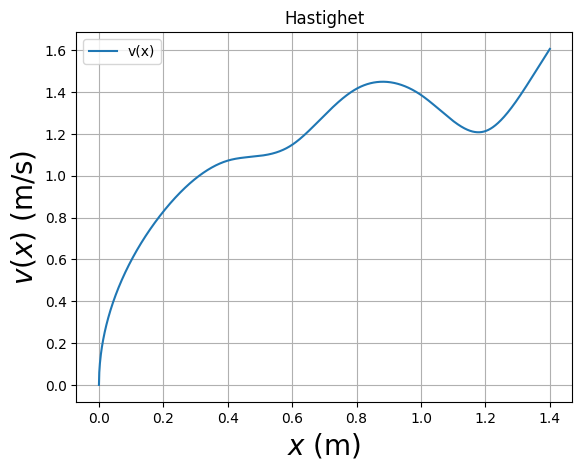

In [230]:
def plot(figName, figTitle, xLabel, yLabel, x_values, y_values, graphLabel=""):
    figName = plt.figure()
    plt.plot(x_values, y_values, label= graphLabel)
    plt.title(figTitle)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend()
    plt.grid()
    plt.show()


figHastighet = plt.figure('v(x)')
plt.title('Hastighet')
plt.plot(x, v(), label='v(x)')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$v(x)$ (m/s)',fontsize=20)
plt.grid()
plt.legend()
plt.show()

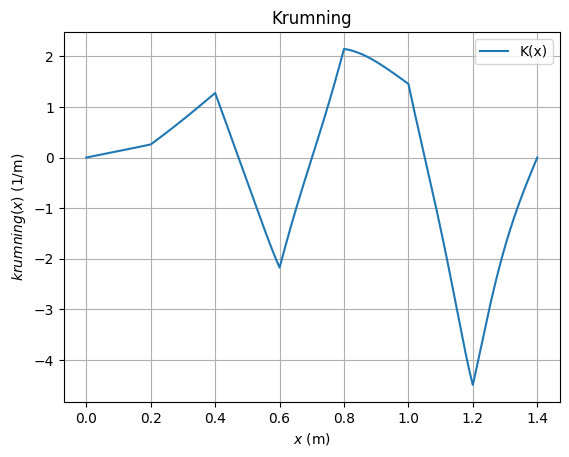

In [231]:
plot("krumning", "Krumning", "$x$ (m)", "$krumning(x)$ (1/m)", x, krumning(), "K(x)")

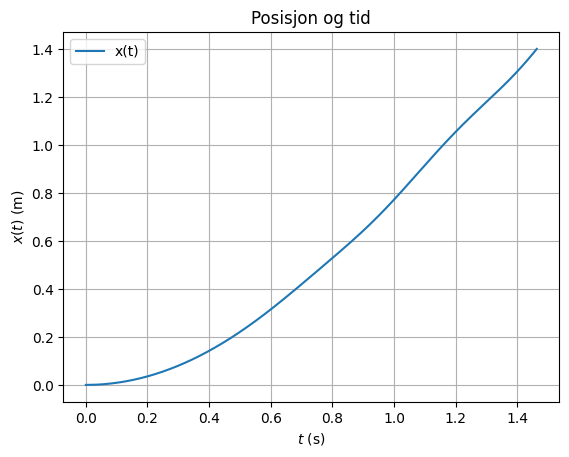

In [232]:
plot("Posisjon og tid", "Posisjon og tid", "$t$ (s)", "$x(t)$ (m)", eulersmethod_x(), x, "x(t)")

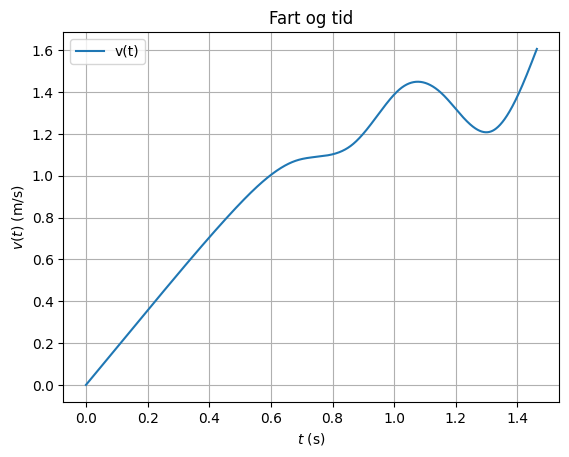

In [238]:
plot("Fart og tid", "Fart og tid", "$t$ (s)", "$v(t)$ (m/s)", eulersmethod_x(), v_x(), "v(t)")

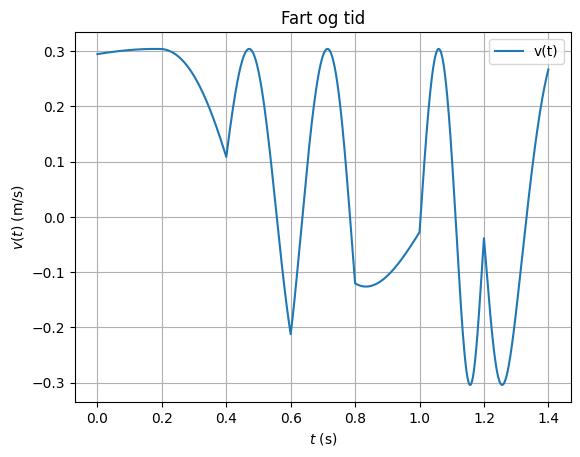

In [242]:
#plot("Fart og tid", "Fart og tid", "$t$ (s)", "$v(t)$ (m/s)", x, normalkraft(), "v(t)")